<a href="https://colab.research.google.com/github/RafaelSoftwareEngineering/DesafioFalqonVerCtrl/blob/main/DesafioFalqon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# → **Falqon** 
> ## → Teste Prático - Desenvolvedor Python
A proposta do exercício é fazer todo o controle de pedidos de mesa de um restaurante e fechar suas comandas dando o gasto de cada mesa

input:
    o código gerador_de_pedidos.ipynb ficará rodando em looping e gerando vários pedidos aleatórios na pasta pedidos/
    
desafio 1:
    ler todos esses pedidos gerados e gerar uma nota fiscal contendo o nome de cada produto junto com seu preço unitário mais o seu preço total e o total da consumação da mesa, semelhante a uma nota fiscal.
    
desafio 2: 
    gerar "backups" versionados dos pedidos (gravar em banco de dados - desafio 5), afinal em um dia de expediente a mesma mesa pode receber vários pedidos

desafio 3:
    faturamento do dia, fazer um acumulado de todos os pedidos e valores que entraram naquele dia de atendimento. 
    
desafio 4:
    movimentação por garçon, referenciando o pedido e o valor, por data

desafio 5:
    armazenar o resultado dos desafios em tabelas de banco de dados (SQL Server), recebendo nome e campos de acordo com o perfil do dado armazenado. 
Deve possuir comunicação entre as tabelas com modelagem de dados simples.    

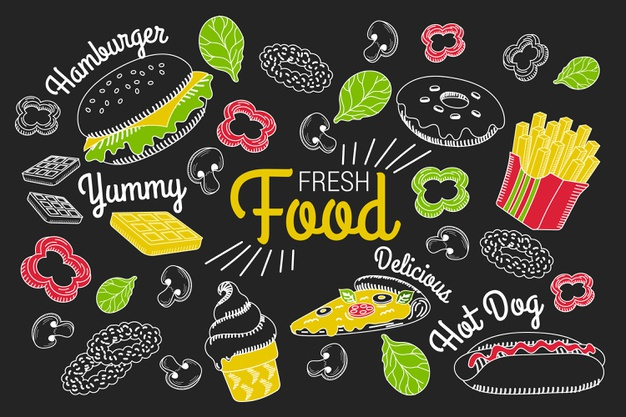



In [1]:
from __future__ import unicode_literals
def main():
  tb_codigos = config_default['DEFAULT'].get('tb_cod_produtos')
  tb_garcons = config_default['DEFAULT'].get('tb_garcons')
  codigos = pd.read_csv(tb_codigos)
  garcons = pd.read_csv(tb_garcons,sep='|')
  qtd_mesa = (config_default['DEFAULT'].getint('mesas'))
  #geradora de arquvos com os pedidos:
  for mesa in range(1,qtd_mesa + 1):
    numero_pedidos = random.randint(1,10)
    atendente = escolhe_opcao(garcons)[0]
    pedido = gera_pedido(codigos)
    pedido['atendente'] = atendente
    df_pedido = pd.DataFrame(pedido,index=[0])
    for i in range(numero_pedidos):
      pedido = gera_pedido(codigos)
      atendente = escolhe_opcao(garcons)[0]
      pedido['atendente'] = atendente
      df_pedido2 =  pd.DataFrame(pedido,index=[0])
      df_pedido = pd.concat([df_pedido,df_pedido2])
    df_pedido[['atendente','quantidade','produto']].to_csv('/content/mesa_' + str(mesa) + '.csv', sep='\t', index=False, header=False, encoding='utf-8')
    sleep(2)



In [2]:
import pandas as pd
import random
from time import sleep
from my_functions import *
from configparser import ConfigParser


if __name__ == '__main__':
  config_default = ConfigParser()
  config_default.read('/content/config.ini')
  rodadas = (config_default['DEFAULT'].get('rodadas')) 
  
  for i in range(int(rodadas) + int(1)):
    main()
    sleep(5)
  with open('/content/fim.txt','w') as f:
    f.write('OK')
  


## Pedidos devidamente gerados

> Agora prossegue-se para a leitura dos dados e posterior geração da nota fiscal com todos os requisitos propostos:





In [3]:
import pandas as pd

urlCodigos = "/content/codigos.csv"

codigosTb = pd.read_csv(urlCodigos)
display(codigosTb)

,COD_PRODUTO
0,401
1,5643
2,8104
3,3803
4,9416
...,...
63,4140
64,5018
65,8658
66,1665


In [4]:
urlCardapio = "/content/cardapio.csv"

CardapioTb = pd.read_csv(urlCardapio)
display(CardapioTb)

,COD_PRODUTO|PRODUTO|PREÇO
0,401|Chateaux Pradeaux: Bandol|52.0
1,5643|Chateaux Pradeaux: Mouvedre|52.0
2,8104|Henry Varnay: Saumur|6.0
3,3803|Henry Varnay: Chenin Blanc|22.0
4,9416|Yves Lambert: Loire|25.0
...,...
63,4140|Hanger Steak|17.0
64,5018|Ribeye With Fries|2.0
65,8658|Sauteed Greens|3.0
66,1665|Potatoes|3.0


## Será necessário melhorar a visualização do cardápio:

In [5]:
CardapioArrumado = CardapioTb["COD_PRODUTO|PRODUTO|PREÇO"].str.split("|", 2, expand = True)
display(CardapioArrumado)

,0,1,2
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


In [6]:
CardapioArrumado.columns = ['CodigoProduto', 'NomeProduto', 'Preço']
display(CardapioArrumado)

,CodigoProduto,NomeProduto,Preço
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


## Agora temos o cardápio arrumado ↑

Agora refatorar e entender os pedidos:

In [7]:
urlMesa1 = "/content/mesa_1.csv"

PedidosM1 = pd.read_csv(urlMesa1)
display(PedidosM1)

,1018287\t2\t8389
0,2817671287\t1\t1277
1,9128120928\t3\t8276
2,2371923719\t3\t3344
3,2817671287\t1\t3108


In [8]:
display(CardapioArrumado[CardapioArrumado.CodigoProduto == '8276'])

,CodigoProduto,NomeProduto,Preço
6,8276,L'hereu: Cava,28.0


In [9]:
urlGarcons = "/content/garcons.csv"

dadosGarcons = pd.read_csv(urlGarcons)
display(dadosGarcons)

,cod_garçom|nome_garçom
0,2371923719|O Campeão
1,9128120928|O Grande
2,8881098712|O Meu Amigo
3,0009917293|Meu Consagrado
4,0001018287|Minha Querida
5,2817671287|Moça


Refatoração das tbs garcons e pedidos:

In [10]:
garconsArrumado = dadosGarcons["cod_garçom|nome_garçom"].str.split("|", 1, expand = True)
display(garconsArrumado)

,0,1
0,2371923719,O Campeão
1,9128120928,O Grande
2,8881098712,O Meu Amigo
3,0009917293,Meu Consagrado
4,0001018287,Minha Querida
5,2817671287,Moça


In [11]:
garconsArrumado.columns = ['ID', 'Nick']
display(garconsArrumado)

,ID,Nick
0,2371923719,O Campeão
1,9128120928,O Grande
2,8881098712,O Meu Amigo
3,0009917293,Meu Consagrado
4,0001018287,Minha Querida
5,2817671287,Moça


## Agora temos a table dos garçons arrumada ↑

agora prosseguimos arrumando os pedidos mesa 1:

In [13]:
PedidosM1Arrumado = PedidosM1["1018287\t2\t8389"].str.split("\t", 2, expand = True)
display(PedidosM1Arrumado)

,0,1,2
0,2817671287,1,1277
1,9128120928,3,8276
2,2371923719,3,3344
3,2817671287,1,3108


In [15]:
PedidosM1Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']
display(PedidosM1Arrumado)

,ID,Qtd,CodigoProduto
0,2817671287,1,1277
1,9128120928,3,8276
2,2371923719,3,3344
3,2817671287,1,3108


###O index da tabela de pedidos representa uma rodada, na 1º rodada o garçom O Meu Amigo fez o atendimento e a mesa1 consumiu 4 L'hereu: Cava no valor de 28.0 $ cada

> Nesse caso a nota fiscal contém valor total de 112 $, o produto, preço unitário... 

Agora a geração da Nota Fiscal:

In [16]:
display(CardapioArrumado)

,CodigoProduto,NomeProduto,Preço
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


In [17]:
NFMesa1 = pd.merge(PedidosM1Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")
display(NFMesa1)

,ID,Qtd,CodigoProduto,NomeProduto,Preço
0,2817671287,1,1277,Rusty Nail: Scotch,6.5
1,9128120928,3,8276,L'hereu: Cava,28.0
2,2371923719,3,3344,Vowel: Oj,7.5
3,2817671287,1,3108,L'hereu: Macabeo,28.0


podemos adicionar uma nova coluna com o valor total

#Dados Fiscais Mesa 1:

In [18]:
NFMesa1["Qtd"] = NFMesa1["Qtd"].astype(float)
NFMesa1["Preço"] = NFMesa1["Preço"].astype(float)
dadosNfMesa1 = NFMesa1.assign(Total = NFMesa1.Qtd * NFMesa1.Preço)

dadosNfMesa1["Data"] = "19/05/2021"
dadosNfMesa1["Mês"] = "Maio"

display(dadosNfMesa1)
SomadasRodadasM1 = dadosNfMesa1.Total.sum()
print("Soma das rodadas mesa 1 =", SomadasRodadasM1,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,1.0,1277,Rusty Nail: Scotch,6.5,6.5,19/05/2021,Maio
1,9128120928,3.0,8276,L'hereu: Cava,28.0,84.0,19/05/2021,Maio
2,2371923719,3.0,3344,Vowel: Oj,7.5,22.5,19/05/2021,Maio
3,2817671287,1.0,3108,L'hereu: Macabeo,28.0,28.0,19/05/2021,Maio


Soma das rodadas mesa 1 = 141.0 $


#Dados Fiscais Mesa 2:

In [ ]:
urlMesa2 = "/content/mesa_2.csv"

PedidosM2 = pd.read_csv(urlMesa2)
display(PedidosM2)

In [21]:

PedidosM2Arrumado = PedidosM2["9128120928\t1\t1277"].str.split("\t", 2, expand = True)

PedidosM2Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa2 = pd.merge(PedidosM2Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa2["Qtd"] = NFMesa2["Qtd"].astype(float)
NFMesa2["Preço"] = NFMesa2["Preço"].astype(float)
dadosNFMesa2 = NFMesa2.assign(Total = NFMesa2.Qtd * NFMesa2.Preço)
dadosNFMesa2["Data"] = "19/05/2021"
dadosNFMesa2["Mês"] = "Maio"
display(dadosNFMesa2)

SomadasRodadasM2 = dadosNFMesa2.Total.sum()
print("Soma das rodadas mesa 2 =", SomadasRodadasM2,"$")


,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9917293,2.0,2489,Larmandier: Chardonnay,82.0,164.0,19/05/2021,Maio
1,2817671287,1.0,831,Pierre Gimonnet: Chardonnay,75.0,75.0,19/05/2021,Maio
2,2371923719,1.0,6723,Corpse Reviver: Pastis,7.5,7.5,19/05/2021,Maio
3,9917293,1.0,8658,Sauteed Greens,3.0,3.0,19/05/2021,Maio
4,9128120928,4.0,6882,Brundlmayer: Austria,65.0,260.0,19/05/2021,Maio
5,9128120928,1.0,2275,Presidente,4.0,4.0,19/05/2021,Maio
6,8881098712,3.0,729,Bass,4.5,13.5,19/05/2021,Maio
7,8881098712,2.0,4032,Champagne Cocktail: Champagne,6.5,13.0,19/05/2021,Maio


Soma das rodadas mesa 2 = 540.0 $


#Dados Fiscais Mesa 3:

In [ ]:
urlMesa3 = "/content/mesa_3.csv"

PedidosM3 = pd.read_csv(urlMesa3)
display(PedidosM3)

In [23]:

PedidosM3Arrumado = PedidosM3["1018287\t2\t1844"].str.split("\t", 2, expand = True)

PedidosM3Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa3 = pd.merge(PedidosM3Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa3["Qtd"] = NFMesa3["Qtd"].astype(float)
NFMesa3["Preço"] = NFMesa3["Preço"].astype(float)
dadosNFMesa3 = NFMesa3.assign(Total = NFMesa3.Qtd * NFMesa3.Preço)
dadosNFMesa3["Data"] = "19/05/2021"
dadosNFMesa3["Mês"] = "Maio"
display(dadosNFMesa3)

SomadasRodadasM3 = dadosNFMesa3.Total.sum()
print("Soma das rodadas mesa 3 =", SomadasRodadasM3,"$")


,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,1018287,3.0,8389,Burger,9.0,27.0,19/05/2021,Maio
1,2817671287,2.0,6688,Stove Pipe Porter,5.0,10.0,19/05/2021,Maio


Soma das rodadas mesa 3 = 37.0 $


#Dados Fiscais Mesa 4:

In [ ]:
urlMesa4 = "/content/mesa_4.csv"

PedidosM4 = pd.read_csv(urlMesa4)
display(PedidosM4)

In [25]:

PedidosM4Arrumado = PedidosM4["9917293\t1\t831"].str.split("\t", 2, expand = True)

PedidosM4Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa4 = pd.merge(PedidosM4Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa4["Qtd"] = NFMesa4["Qtd"].astype(float)
NFMesa4["Preço"] = NFMesa4["Preço"].astype(float)
dadosNFMesa4 = NFMesa4.assign(Total = NFMesa4.Qtd * NFMesa4.Preço)
dadosNFMesa4["Data"] = "19/05/2021"
dadosNFMesa4["Mês"] = "Maio"
display(dadosNFMesa4)

SomadasRodadasM4 = dadosNFMesa4.Total.sum()
print("Soma das rodadas mesa 4 =", SomadasRodadasM4,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,1018287,3.0,3341,Heinekin,4.5,13.5,19/05/2021,Maio
1,9128120928,1.0,3344,Vowel: Oj,7.5,7.5,19/05/2021,Maio
2,2817671287,1.0,8750,L'hereu: Xarel Lo,28.0,28.0,19/05/2021,Maio


Soma das rodadas mesa 4 = 49.0 $


#Dados Fiscais Mesa 5:

In [ ]:
urlMesa5 = "/content/mesa_5.csv"

PedidosM5 = pd.read_csv(urlMesa5)
display(PedidosM5)

In [27]:

PedidosM5Arrumado = PedidosM5["2371923719\t2\t5018"].str.split("\t", 2, expand = True)

PedidosM5Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa5 = pd.merge(PedidosM5Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa5["Qtd"] = NFMesa5["Qtd"].astype(float)
NFMesa5["Preço"] = NFMesa5["Preço"].astype(float)
dadosNFMesa5 = NFMesa5.assign(Total = NFMesa5.Qtd * NFMesa5.Preço)
dadosNFMesa5["Data"] = "19/05/2021"
dadosNFMesa5["Mês"] = "Maio"
display(dadosNFMesa5)

SomadasRodadasM5 = dadosNFMesa5.Total.sum()
print("Soma das rodadas mesa 5 =", SomadasRodadasM5,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2371923719,1.0,3620,Guinness,5.0,5.0,19/05/2021,Maio
1,2371923719,2.0,8361,Bronx: Dry & Sweet Vermouth,7.5,15.0,19/05/2021,Maio
2,2817671287,2.0,2633,Chimay,6.5,13.0,19/05/2021,Maio
3,2371923719,1.0,9757,Bronx: Oj & Bitters,7.5,7.5,19/05/2021,Maio
4,9917293,2.0,1844,Champagne Cocktail: Bitters,6.5,13.0,19/05/2021,Maio
5,1018287,1.0,514,Bronx: Gin,7.5,7.5,19/05/2021,Maio


Soma das rodadas mesa 5 = 61.0 $


#Dados Fiscais Mesa 6:

In [ ]:
urlMesa6 = "/content/mesa_6.csv"

PedidosM6 = pd.read_csv(urlMesa6)
display(PedidosM6)

In [29]:

PedidosM6Arrumado = PedidosM6["2817671287\t2\t8276"].str.split("\t", 2, expand = True)

PedidosM6Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa6 = pd.merge(PedidosM6Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa6["Qtd"] = NFMesa6["Qtd"].astype(float)
NFMesa6["Preço"] = NFMesa6["Preço"].astype(float)
dadosNFMesa6 = NFMesa6.assign(Total = NFMesa6.Qtd * NFMesa6.Preço)
dadosNFMesa6["Data"] = "19/05/2021"
dadosNFMesa6["Mês"] = "Maio"
display(dadosNFMesa6)

SomadasRodadasM6 = dadosNFMesa6.Total.sum()
print("Soma das rodadas mesa 6 =", SomadasRodadasM6,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9128120928,3.0,9842,Samuel Smith Pale Ale,5.0,15.0,19/05/2021,Maio


Soma das rodadas mesa 6 = 15.0 $


#Dados Fiscais Mesa 7:

In [ ]:
urlMesa7 = "/content/mesa_7.csv"

PedidosM7 = pd.read_csv(urlMesa7)
display(PedidosM7)

In [31]:
PedidosM7Arrumado = PedidosM7["2817671287\t3\t5496"].str.split("\t", 2, expand = True)

PedidosM7Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa7 = pd.merge(PedidosM7Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa7["Qtd"] = NFMesa7["Qtd"].astype(float)
NFMesa7["Preço"] = NFMesa7["Preço"].astype(float)
dadosNFMesa7 = NFMesa7.assign(Total = NFMesa7.Qtd * NFMesa7.Preço)
dadosNFMesa7["Data"] = "19/05/2021"
dadosNFMesa7["Mês"] = "Maio"
display(dadosNFMesa7)

SomadasRodadasM7 = dadosNFMesa7.Total.sum()
print("Soma das rodadas mesa 7 =", SomadasRodadasM7,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2371923719,1.0,9842,Samuel Smith Pale Ale,5.0,5.0,19/05/2021,Maio
1,2371923719,3.0,1844,Champagne Cocktail: Bitters,6.5,19.5,19/05/2021,Maio
2,2371923719,3.0,1915,Ferrando: Piedmont,48.0,144.0,19/05/2021,Maio
3,1018287,1.0,5018,Ribeye With Fries,2.0,2.0,19/05/2021,Maio
4,9917293,3.0,3341,Heinekin,4.5,13.5,19/05/2021,Maio
5,8881098712,3.0,5643,Chateaux Pradeaux: Mouvedre,52.0,156.0,19/05/2021,Maio
6,9128120928,2.0,8361,Bronx: Dry & Sweet Vermouth,7.5,15.0,19/05/2021,Maio


Soma das rodadas mesa 7 = 355.0 $


#Dados Fiscais Mesa 8:

In [ ]:
urlMesa8 = "/content/mesa_8.csv"

PedidosM8 = pd.read_csv(urlMesa8)
display(PedidosM8)

In [33]:
PedidosM8Arrumado = PedidosM8["9128120928\t3\t2489"].str.split("\t", 2, expand = True)

PedidosM8Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa8 = pd.merge(PedidosM8Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa8["Qtd"] = NFMesa8["Qtd"].astype(float)
NFMesa8["Preço"] = NFMesa8["Preço"].astype(float)
dadosNFMesa8 = NFMesa8.assign(Total = NFMesa8.Qtd * NFMesa8.Preço)
dadosNFMesa8["Data"] = "19/05/2021"
dadosNFMesa8["Mês"] = "Maio"
display(dadosNFMesa8)

SomadasRodadasM8 = dadosNFMesa8.Total.sum()
print("Soma das rodadas mesa 8 =", SomadasRodadasM8,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9917293,3.0,5057,Vowel: Akavit,7.5,22.5,19/05/2021,Maio
1,2817671287,2.0,9035,Jean Lallement: Champagne,80.0,160.0,19/05/2021,Maio
2,9128120928,2.0,8619,Jean Lallement: Pinot Noir,80.0,160.0,19/05/2021,Maio
3,9128120928,1.0,8658,Sauteed Greens,3.0,3.0,19/05/2021,Maio


Soma das rodadas mesa 8 = 345.5 $


#Dados Fiscais Mesa 9:

In [ ]:
urlMesa9 = "/content/mesa_9.csv"

PedidosM9 = pd.read_csv(urlMesa9)
display(PedidosM9)

In [35]:
PedidosM9Arrumado = PedidosM9["9128120928\t1\t9842"].str.split("\t", 2, expand = True)

PedidosM9Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa9 = pd.merge(PedidosM9Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa9["Qtd"] = NFMesa9["Qtd"].astype(float)
NFMesa9["Preço"] = NFMesa9["Preço"].astype(float)
dadosNFMesa9 = NFMesa9.assign(Total = NFMesa9.Qtd * NFMesa9.Preço)
dadosNFMesa9["Data"] = "19/05/2021"
dadosNFMesa9["Mês"] = "Maio"
display(dadosNFMesa9)

SomadasRodadasM9 = dadosNFMesa9.Total.sum()
print("Soma das rodadas mesa 9 =", SomadasRodadasM9,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9917293,1.0,9039,Green Salad,5.0,5.0,19/05/2021,Maio
1,2817671287,1.0,9039,Green Salad,5.0,5.0,19/05/2021,Maio
2,2817671287,3.0,8322,Corpse Reviver: Gin,7.5,22.5,19/05/2021,Maio


Soma das rodadas mesa 9 = 32.5 $


#Dados Fiscais Mesa 10:

In [ ]:
urlMesa10 = "/content/mesa_10.csv"

PedidosM10 = pd.read_csv(urlMesa10)
display(PedidosM10)

In [37]:

PedidosM10Arrumado = PedidosM10["8881098712\t2\t6688"].str.split("\t", 2, expand = True)

PedidosM10Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa10 = pd.merge(PedidosM10Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa10["Qtd"] = NFMesa10["Qtd"].astype(float)
NFMesa10["Preço"] = NFMesa10["Preço"].astype(float)
dadosNFMesa10 = NFMesa10.assign(Total = NFMesa10.Qtd * NFMesa10.Preço)
dadosNFMesa10["Data"] = "19/05/2021"
dadosNFMesa10["Mês"] = "Maio"
display(dadosNFMesa10)

SomadasRodadasM10 = dadosNFMesa10.Total.sum()
print("Soma das rodadas mesa 10 =", SomadasRodadasM10,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9128120928,3.0,1418,Pierre Gimonnet: Champagne,75.0,225.0,19/05/2021,Maio
1,9128120928,3.0,334,Ferrando: Erbaluce,48.0,144.0,19/05/2021,Maio
2,2371923719,4.0,1277,Rusty Nail: Scotch,6.5,26.0,19/05/2021,Maio
3,2371923719,1.0,6783,Foreau: Vouvray,52.0,52.0,19/05/2021,Maio
4,1018287,1.0,3064,Brundlmayer: Pinot Noir,65.0,65.0,19/05/2021,Maio
5,2371923719,1.0,9757,Bronx: Oj & Bitters,7.5,7.5,19/05/2021,Maio


Soma das rodadas mesa 10 = 519.5 $


#Dados Fiscais Mesa 11:

In [ ]:
urlMesa11 = "/content/mesa_11.csv"

PedidosM11 = pd.read_csv(urlMesa11)
display(PedidosM11)

In [39]:
PedidosM11Arrumado = PedidosM11["2371923719\t1\t729"].str.split("\t", 2, expand = True)

PedidosM11Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa11 = pd.merge(PedidosM11Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa11["Qtd"] = NFMesa11["Qtd"].astype(float)
NFMesa11["Preço"] = NFMesa11["Preço"].astype(float)
dadosNFMesa11 = NFMesa11.assign(Total = NFMesa11.Qtd * NFMesa11.Preço)
dadosNFMesa11["Data"] = "19/05/2021"
dadosNFMesa11["Mês"] = "Maio"
display(dadosNFMesa11)

SomadasRodadasM11 = dadosNFMesa11.Total.sum()
print("Soma das rodadas mesa 11 =", SomadasRodadasM11,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9128120928,4.0,8619,Jean Lallement: Pinot Noir,80.0,320.0,19/05/2021,Maio
1,8881098712,2.0,8511,Jean Lallement: Chardonnay,80.0,160.0,19/05/2021,Maio
2,2817671287,3.0,9416,Yves Lambert: Loire,25.0,75.0,19/05/2021,Maio
3,8881098712,1.0,1606,French 75: Brandy,7.0,7.0,19/05/2021,Maio


Soma das rodadas mesa 11 = 562.0 $


#Dados Fiscais Mesa 12:

In [ ]:
urlMesa12 = "/content/mesa_12.csv"

PedidosM12 = pd.read_csv(urlMesa12)
display(PedidosM12)

In [41]:
PedidosM12Arrumado = PedidosM12["2371923719\t2\t8389"].str.split("\t", 2, expand = True)

PedidosM12Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa12 = pd.merge(PedidosM12Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa12["Qtd"] = NFMesa12["Qtd"].astype(float)
NFMesa12["Preço"] = NFMesa12["Preço"].astype(float)
dadosNFMesa12 = NFMesa12.assign(Total = NFMesa12.Qtd * NFMesa12.Preço)
dadosNFMesa12["Data"] = "19/05/2021"
dadosNFMesa12["Mês"] = "Maio"
display(dadosNFMesa12)

SomadasRodadasM12 = dadosNFMesa12.Total.sum()
print("Soma das rodadas mesa 12 =", SomadasRodadasM12,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,3.0,1571,Soup,5.0,15.0,19/05/2021,Maio
1,1018287,1.0,1915,Ferrando: Piedmont,48.0,48.0,19/05/2021,Maio


Soma das rodadas mesa 12 = 63.0 $


#Dados Fiscais Mesa 13:

In [ ]:
urlMesa13 = "/content/mesa_13.csv"

PedidosM13 = pd.read_csv(urlMesa13)
display(PedidosM13)

In [43]:
PedidosM13Arrumado = PedidosM13["1018287\t1\t5496"].str.split("\t", 2, expand = True)

PedidosM13Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa13 = pd.merge(PedidosM13Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa13["Qtd"] = NFMesa13["Qtd"].astype(float)
NFMesa13["Preço"] = NFMesa13["Preço"].astype(float)
dadosNFMesa13 = NFMesa13.assign(Total = NFMesa13.Qtd * NFMesa13.Preço)
dadosNFMesa13["Data"] = "19/05/2021"
dadosNFMesa13["Mês"] = "Maio"
display(dadosNFMesa13)

SomadasRodadasM13 = dadosNFMesa13.Total.sum()
print("Soma das rodadas mesa 13 =", SomadasRodadasM13,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9128120928,1.0,3341,Heinekin,4.5,4.5,19/05/2021,Maio
1,9128120928,1.0,25,Champagne Cocktail: Sugar Cube,6.5,6.5,19/05/2021,Maio
2,2817671287,4.0,7675,Rusty Nail: Drambuie,6.5,26.0,19/05/2021,Maio
3,2817671287,3.0,5018,Ribeye With Fries,2.0,6.0,19/05/2021,Maio
4,2817671287,3.0,5073,Brundlmayer: Pinot Blanc,65.0,195.0,19/05/2021,Maio
5,1018287,3.0,5405,Yves Lambert: Chenin Blanc,25.0,75.0,19/05/2021,Maio
6,2817671287,2.0,3064,Brundlmayer: Pinot Noir,65.0,130.0,19/05/2021,Maio
7,8881098712,1.0,9757,Bronx: Oj & Bitters,7.5,7.5,19/05/2021,Maio


Soma das rodadas mesa 13 = 450.5 $


#Dados Fiscais Mesa 14:

In [ ]:
urlMesa14 = "/content/mesa_14.csv"

PedidosM14 = pd.read_csv(urlMesa14)
display(PedidosM14)

In [45]:
PedidosM14Arrumado = PedidosM14["9128120928\t1\t1418"].str.split("\t", 2, expand = True)

PedidosM14Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa14 = pd.merge(PedidosM14Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa14["Qtd"] = NFMesa14["Qtd"].astype(float)
NFMesa14["Preço"] = NFMesa14["Preço"].astype(float)
dadosNFMesa14 = NFMesa14.assign(Total = NFMesa14.Qtd * NFMesa14.Preço)
dadosNFMesa14["Data"] = "19/05/2021"
dadosNFMesa14["Mês"] = "Maio"
display(dadosNFMesa14)

SomadasRodadasM14 = dadosNFMesa14.Total.sum()
print("Soma das rodadas mesa 14 =", SomadasRodadasM14,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,1018287,1.0,9416,Yves Lambert: Loire,25.0,25.0,19/05/2021,Maio
1,2817671287,1.0,7675,Rusty Nail: Drambuie,6.5,6.5,19/05/2021,Maio
2,9128120928,1.0,5018,Ribeye With Fries,2.0,2.0,19/05/2021,Maio
3,9917293,3.0,6882,Brundlmayer: Austria,65.0,195.0,19/05/2021,Maio
4,9128120928,1.0,514,Bronx: Gin,7.5,7.5,19/05/2021,Maio
5,2817671287,1.0,3064,Brundlmayer: Pinot Noir,65.0,65.0,19/05/2021,Maio
6,2371923719,4.0,3296,Larmandier: Champagne,82.0,328.0,19/05/2021,Maio
7,9917293,1.0,5405,Yves Lambert: Chenin Blanc,25.0,25.0,19/05/2021,Maio
8,9128120928,1.0,9734,Cheeseburger,9.5,9.5,19/05/2021,Maio
9,2817671287,3.0,4084,Vowel: Scotch,7.5,22.5,19/05/2021,Maio


Soma das rodadas mesa 14 = 686.0 $


#Dados Fiscais Mesa 15:

In [ ]:
urlMesa15 = "/content/mesa_15.csv"

PedidosM15 = pd.read_csv(urlMesa15)
display(PedidosM15)

In [47]:

PedidosM15Arrumado = PedidosM15["8881098712\t1\t3296"].str.split("\t", 2, expand = True)

PedidosM15Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa15 = pd.merge(PedidosM15Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa15["Qtd"] = NFMesa15["Qtd"].astype(float)
NFMesa15["Preço"] = NFMesa15["Preço"].astype(float)
dadosNFMesa15 = NFMesa15.assign(Total = NFMesa15.Qtd * NFMesa15.Preço)
dadosNFMesa15["Data"] = "19/05/2021"
dadosNFMesa15["Mês"] = "Maio"
display(dadosNFMesa15)

SomadasRodadasM15 = dadosNFMesa15.Total.sum()#
print("Soma das rodadas mesa 15 =", SomadasRodadasM15,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,9917293,2.0,3296,Larmandier: Champagne,82.0,164.0,19/05/2021,Maio
1,8881098712,2.0,3620,Guinness,5.0,10.0,19/05/2021,Maio
2,2371923719,1.0,1418,Pierre Gimonnet: Champagne,75.0,75.0,19/05/2021,Maio
3,9128120928,1.0,9888,Gouden Carolus,7.5,7.5,19/05/2021,Maio
4,8881098712,1.0,9035,Jean Lallement: Champagne,80.0,80.0,19/05/2021,Maio
5,9128120928,2.0,8276,L'hereu: Cava,28.0,56.0,19/05/2021,Maio
6,9917293,4.0,5863,Mussels With Fries,12.5,50.0,19/05/2021,Maio


Soma das rodadas mesa 15 = 442.5 $


#Dados Fiscais Mesa 16:

In [48]:
urlMesa16 = "/content/mesa_16.csv"

PedidosM16 = pd.read_csv(urlMesa16)
display(PedidosM16)

,9917293\t1\t6882
0,8881098712\t2\t8750
1,2817671287\t1\t4032
2,9917293\t2\t8361
3,2371923719\t4\t8389
4,9128120928\t3\t9734
5,8881098712\t4\t2633
6,2371923719\t1\t7330
7,9917293\t4\t2275


In [49]:
PedidosM16Arrumado = PedidosM16["9917293\t1\t6882"].str.split("\t", 2, expand = True)

PedidosM16Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa16 = pd.merge(PedidosM16Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa16["Qtd"] = NFMesa16["Qtd"].astype(float)
NFMesa16["Preço"] = NFMesa16["Preço"].astype(float)
dadosNFMesa16 = NFMesa16.assign(Total = NFMesa16.Qtd * NFMesa16.Preço)
dadosNFMesa16["Data"] = "19/05/2021"
dadosNFMesa16["Mês"] = "Maio"
display(dadosNFMesa16)

SomadasRodadasM16 = dadosNFMesa16.Total.sum()
print("Soma das rodadas mesa 16 =", SomadasRodadasM16,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,8881098712,2.0,8750,L'hereu: Xarel Lo,28.0,56.0,19/05/2021,Maio
1,2817671287,1.0,4032,Champagne Cocktail: Champagne,6.5,6.5,19/05/2021,Maio
2,9917293,2.0,8361,Bronx: Dry & Sweet Vermouth,7.5,15.0,19/05/2021,Maio
3,2371923719,4.0,8389,Burger,9.0,36.0,19/05/2021,Maio
4,9128120928,3.0,9734,Cheeseburger,9.5,28.5,19/05/2021,Maio
5,8881098712,4.0,2633,Chimay,6.5,26.0,19/05/2021,Maio
6,2371923719,1.0,7330,French Fries,3.5,3.5,19/05/2021,Maio
7,9917293,4.0,2275,Presidente,4.0,16.0,19/05/2021,Maio


Soma das rodadas mesa 16 = 187.5 $


#Dados Fiscais Mesa 17:

In [ ]:
urlMesa17 = "/content/mesa_17.csv"

PedidosM17 = pd.read_csv(urlMesa17)
display(PedidosM17)


In [51]:

PedidosM17Arrumado = PedidosM17["2371923719\t3\t2275"].str.split("\t", 2, expand = True)

PedidosM17Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa17 = pd.merge(PedidosM17Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa17["Qtd"] = NFMesa17["Qtd"].astype(float)
NFMesa17["Preço"] = NFMesa17["Preço"].astype(float)
dadosNFMesa17 = NFMesa17.assign(Total = NFMesa17.Qtd * NFMesa17.Preço)
dadosNFMesa17["Data"] = "19/05/2021"
dadosNFMesa17["Mês"] = "Maio"
display(dadosNFMesa17)

SomadasRodadasM17 = dadosNFMesa17.Total.sum()
print("Soma das rodadas mesa 17 =", SomadasRodadasM17,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2371923719,2.0,8677,Czechvar,5.0,10.0,19/05/2021,Maio
1,9128120928,3.0,9416,Yves Lambert: Loire,25.0,75.0,19/05/2021,Maio
2,1018287,3.0,5018,Ribeye With Fries,2.0,6.0,19/05/2021,Maio
3,2371923719,2.0,8511,Jean Lallement: Chardonnay,80.0,160.0,19/05/2021,Maio
4,9917293,2.0,2378,Brandy Alexander: Cream,7.0,14.0,19/05/2021,Maio
5,1018287,3.0,4032,Champagne Cocktail: Champagne,6.5,19.5,19/05/2021,Maio
6,2817671287,1.0,8276,L'hereu: Cava,28.0,28.0,19/05/2021,Maio
7,1018287,1.0,3169,Vowel: Sweet Vermouth,7.5,7.5,19/05/2021,Maio
8,9917293,2.0,9039,Green Salad,5.0,10.0,19/05/2021,Maio
9,9128120928,3.0,8619,Jean Lallement: Pinot Noir,80.0,240.0,19/05/2021,Maio


Soma das rodadas mesa 17 = 570.0 $


#Dados Fiscais Mesa 18:

In [ ]:
urlMesa18 = "/content/mesa_18.csv"

PedidosM18 = pd.read_csv(urlMesa18)
display(PedidosM18)

In [53]:
PedidosM18Arrumado = PedidosM18["1018287\t4\t9416"].str.split("\t", 2, expand = True)

PedidosM18Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa18 = pd.merge(PedidosM18Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa18["Qtd"] = NFMesa18["Qtd"].astype(float)
NFMesa18["Preço"] = NFMesa18["Preço"].astype(float)
dadosNFMesa18 = NFMesa18.assign(Total = NFMesa18.Qtd * NFMesa18.Preço)
dadosNFMesa18["Data"] = "19/05/2021"
dadosNFMesa18["Mês"] = "Maio"
display(dadosNFMesa18)

SomadasRodadasM18 = dadosNFMesa18.Total.sum()
print("Soma das rodadas mesa 18 =", SomadasRodadasM18,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,8881098712,3.0,9035,Jean Lallement: Champagne,80.0,240.0,19/05/2021,Maio
1,8881098712,2.0,3344,Vowel: Oj,7.5,15.0,19/05/2021,Maio
2,1018287,2.0,3344,Vowel: Oj,7.5,15.0,19/05/2021,Maio
3,8881098712,1.0,5057,Vowel: Akavit,7.5,7.5,19/05/2021,Maio
4,9917293,2.0,3169,Vowel: Sweet Vermouth,7.5,15.0,19/05/2021,Maio
5,9917293,3.0,831,Pierre Gimonnet: Chardonnay,75.0,225.0,19/05/2021,Maio


Soma das rodadas mesa 18 = 517.5 $


#Dados Fiscais Mesa 19:

In [ ]:
urlMesa19 = "/content/mesa_19.csv"

PedidosM19 = pd.read_csv(urlMesa19)
display(PedidosM19)

In [55]:

PedidosM19Arrumado = PedidosM19["9128120928\t1\t5863"].str.split("\t", 2, expand = True)

PedidosM19Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa19 = pd.merge(PedidosM19Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa19["Qtd"] = NFMesa19["Qtd"].astype(float)
NFMesa19["Preço"] = NFMesa19["Preço"].astype(float)
dadosNFMesa19 = NFMesa19.assign(Total = NFMesa19.Qtd * NFMesa19.Preço)
dadosNFMesa19["Data"] = "19/05/2021"
dadosNFMesa19["Mês"] = "Maio"
display(dadosNFMesa19)

SomadasRodadasM19 = dadosNFMesa19.Total.sum()
print("Soma das rodadas mesa 19 =", SomadasRodadasM19,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,1.0,9551,Brandy Alexander: Brandy,7.0,7.0,19/05/2021,Maio
1,2817671287,2.0,1844,Champagne Cocktail: Bitters,6.5,13.0,19/05/2021,Maio


Soma das rodadas mesa 19 = 20.0 $


#Dados Fiscais Mesa 20:

In [ ]:
urlMesa20 = "/content/mesa_20.csv"

PedidosM20 = pd.read_csv(urlMesa20)
display(PedidosM20)

In [57]:


PedidosM20Arrumado = PedidosM20["2817671287\t1\t7780"].str.split("\t", 2, expand = True)

PedidosM20Arrumado.columns = ['ID', 'Qtd', 'CodigoProduto']

NFMesa20 = pd.merge(PedidosM20Arrumado, CardapioArrumado[["CodigoProduto", "NomeProduto", "Preço"]], on = "CodigoProduto")

NFMesa20["Qtd"] = NFMesa20["Qtd"].astype(float)
NFMesa20["Preço"] = NFMesa20["Preço"].astype(float)
dadosNFMesa20 = NFMesa20.assign(Total = NFMesa20.Qtd * NFMesa20.Preço)
dadosNFMesa20["Data"] = "19/05/2021"
dadosNFMesa20["Mês"] = "Maio"
display(dadosNFMesa20)

SomadasRodadasM20 = dadosNFMesa20.Total.sum()
print("Soma das rodadas mesa 20 =", SomadasRodadasM20,"$")

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,3.0,6723,Corpse Reviver: Pastis,7.5,22.5,19/05/2021,Maio
1,9917293,3.0,9416,Yves Lambert: Loire,25.0,75.0,19/05/2021,Maio
2,9128120928,4.0,4084,Vowel: Scotch,7.5,30.0,19/05/2021,Maio
3,2371923719,2.0,4367,Corpse Reviver: Lillet,7.5,15.0,19/05/2021,Maio
4,1018287,3.0,6882,Brundlmayer: Austria,65.0,195.0,19/05/2021,Maio
5,9917293,1.0,1844,Champagne Cocktail: Bitters,6.5,6.5,19/05/2021,Maio
6,1018287,2.0,9035,Jean Lallement: Champagne,80.0,160.0,19/05/2021,Maio
7,9128120928,1.0,1915,Ferrando: Piedmont,48.0,48.0,19/05/2021,Maio


Soma das rodadas mesa 20 = 552.0 $


## *Agora continuaremos com o fechamento do dia e coleta de todos os dados:* 

In [58]:
x = SomadasRodadasM1 + SomadasRodadasM2 + SomadasRodadasM3 + SomadasRodadasM4 + SomadasRodadasM5 + SomadasRodadasM6 + SomadasRodadasM7 + SomadasRodadasM8 + SomadasRodadasM9 + SomadasRodadasM9 + SomadasRodadasM10 + SomadasRodadasM11 + SomadasRodadasM12 + SomadasRodadasM13 + SomadasRodadasM14 + SomadasRodadasM15 + SomadasRodadasM16 + SomadasRodadasM17 + SomadasRodadasM18 + SomadasRodadasM19 + SomadasRodadasM20
print("Fechamento do dia 3 = ", x, "$")

Fechamento do dia 3 =  6179.0 $


## Usaremos o sqlite

# Fechamento do dia 3 =  6179.0 $

# Desafios 1, 2, 3 e 4 concluídos, agora para o desafio 5:

# Agora Prosseguindo da seguinte maneira:



> Será feita uma refatoração para facilitar o povoamento do banco de dados



> A proposta do banco de dados que será criado consiste em através de queries levantar informações importantes para o negócio e para a análise de dados pertinente, com o intuito de melhorar de alguma forma o business (no caso o restaurante) e facilitar sua administração...



> Segue um diagrama do esquema de banco de dados...

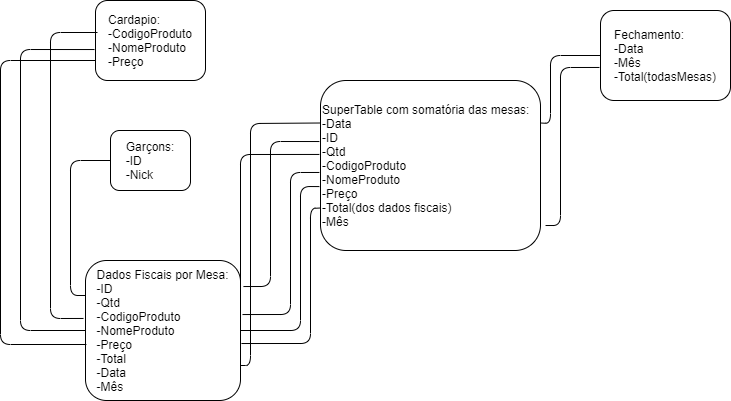







seguindo para a criação do bando de dados:

In [63]:
display(garconsArrumado)

,ID,Nick
0,2371923719,O Campeão
1,9128120928,O Grande
2,8881098712,O Meu Amigo
3,0009917293,Meu Consagrado
4,0001018287,Minha Querida
5,2817671287,Moça


In [64]:
import sqlite3

conn = sqlite3.connect("Teste.db")
print("conn ok")

conn ok


In [66]:
conn.execute('''
CREATE TABLE IF NOT EXISTS Garcons (
  ID integer PRIMARY KEY,
  Nick string
);
''')
conn.commit()
print("table garçons ok")

table garçons ok


In [67]:
garconsArrumado.to_sql(name = "Garcons", con = conn, if_exists = "append", index = False)

In [69]:
back = pd.read_sql('select * from Garcons', conn)
display(back)

,ID,Nick
0,1018287,Minha Querida
1,9917293,Meu Consagrado
2,2371923719,O Campeão
3,2817671287,Moça
4,8881098712,O Meu Amigo
5,9128120928,O Grande


In [70]:
display(CardapioArrumado)

,CodigoProduto,NomeProduto,Preço
0,401,Chateaux Pradeaux: Bandol,52.0
1,5643,Chateaux Pradeaux: Mouvedre,52.0
2,8104,Henry Varnay: Saumur,6.0
3,3803,Henry Varnay: Chenin Blanc,22.0
4,9416,Yves Lambert: Loire,25.0
...,...,...,...
63,4140,Hanger Steak,17.0
64,5018,Ribeye With Fries,2.0
65,8658,Sauteed Greens,3.0
66,1665,Potatoes,3.0


In [71]:
conn.execute('''
CREATE TABLE IF NOT EXISTS Cardapio (
  CodigoProduto integer PRIMARY KEY,
  NomeProduto string,
  Preço float
);
''')
conn.commit()
print("table Cardapio ok")

table Cardapio ok


In [73]:
CardapioArrumado.to_sql(name = "Cardapio", con = conn, if_exists = "append", index = False)

In [74]:
retorno = pd.read_sql('select * from Cardapio', conn)
display(retorno)

,CodigoProduto,NomeProduto,Preço
0,25,Champagne Cocktail: Sugar Cube,6.5
1,334,Ferrando: Erbaluce,48.0
2,401,Chateaux Pradeaux: Bandol,52.0
3,514,Bronx: Gin,7.5
4,729,Bass,4.5
...,...,...,...
63,9551,Brandy Alexander: Brandy,7.0
64,9734,Cheeseburger,9.5
65,9757,Bronx: Oj & Bitters,7.5
66,9842,Samuel Smith Pale Ale,5.0


In [76]:
display(dadosNfMesa1)

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,1.0,1277,Rusty Nail: Scotch,6.5,6.5,19/05/2021,Maio
1,9128120928,3.0,8276,L'hereu: Cava,28.0,84.0,19/05/2021,Maio
2,2371923719,3.0,3344,Vowel: Oj,7.5,22.5,19/05/2021,Maio
3,2817671287,1.0,3108,L'hereu: Macabeo,28.0,28.0,19/05/2021,Maio


In [77]:
display(dadosNFMesa20)

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,3.0,6723,Corpse Reviver: Pastis,7.5,22.5,19/05/2021,Maio
1,9917293,3.0,9416,Yves Lambert: Loire,25.0,75.0,19/05/2021,Maio
2,9128120928,4.0,4084,Vowel: Scotch,7.5,30.0,19/05/2021,Maio
3,2371923719,2.0,4367,Corpse Reviver: Lillet,7.5,15.0,19/05/2021,Maio
4,1018287,3.0,6882,Brundlmayer: Austria,65.0,195.0,19/05/2021,Maio
5,9917293,1.0,1844,Champagne Cocktail: Bitters,6.5,6.5,19/05/2021,Maio
6,1018287,2.0,9035,Jean Lallement: Champagne,80.0,160.0,19/05/2021,Maio
7,9128120928,1.0,1915,Ferrando: Piedmont,48.0,48.0,19/05/2021,Maio


In [100]:
SuperTable = pd.concat([dadosNfMesa1, dadosNFMesa2, dadosNFMesa3, dadosNFMesa4, dadosNFMesa5, dadosNFMesa6, dadosNFMesa7, dadosNFMesa8, dadosNFMesa9, dadosNFMesa10, dadosNFMesa11, dadosNFMesa12, dadosNFMesa13, dadosNFMesa14, dadosNFMesa15, dadosNFMesa16, dadosNFMesa17, dadosNFMesa18, dadosNFMesa19, dadosNFMesa20], ignore_index = True)

display(SuperTable)

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,1.0,1277,Rusty Nail: Scotch,6.5,6.5,19/05/2021,Maio
1,9128120928,3.0,8276,L'hereu: Cava,28.0,84.0,19/05/2021,Maio
2,2371923719,3.0,3344,Vowel: Oj,7.5,22.5,19/05/2021,Maio
3,2817671287,1.0,3108,L'hereu: Macabeo,28.0,28.0,19/05/2021,Maio
4,9917293,2.0,2489,Larmandier: Chardonnay,82.0,164.0,19/05/2021,Maio
...,...,...,...,...,...,...,...,...
104,2371923719,2.0,4367,Corpse Reviver: Lillet,7.5,15.0,19/05/2021,Maio
105,1018287,3.0,6882,Brundlmayer: Austria,65.0,195.0,19/05/2021,Maio
106,9917293,1.0,1844,Champagne Cocktail: Bitters,6.5,6.5,19/05/2021,Maio
107,1018287,2.0,9035,Jean Lallement: Champagne,80.0,160.0,19/05/2021,Maio


In [101]:
SomadasRodadasGeral = SuperTable.Total.sum()
display(SomadasRodadasGeral)

6146.5

In [123]:
conn.execute('''
CREATE TABLE IF NOT EXISTS SuperTable1 (
  ID integer,
  Qtd float,
  CodigoProduto integer,
  NomeProduto string,
  Preço float,
  Total float,
  Data string PRIMARY KEY,
  Mês string
);
''')
conn.commit()
print("table SuperTable ok")

table SuperTable ok


In [124]:
SuperTable.to_sql(name = "SuperTableFinal", con = conn, if_exists = "append", index = False)
SuperTableVar = pd.read_sql('select * from SuperTableFinal', conn)
display(SuperTableVar)

,ID,Qtd,CodigoProduto,NomeProduto,Preço,Total,Data,Mês
0,2817671287,1.0,1277,Rusty Nail: Scotch,6.5,6.5,19/05/2021,Maio
1,9128120928,3.0,8276,L'hereu: Cava,28.0,84.0,19/05/2021,Maio
2,2371923719,3.0,3344,Vowel: Oj,7.5,22.5,19/05/2021,Maio
3,2817671287,1.0,3108,L'hereu: Macabeo,28.0,28.0,19/05/2021,Maio
4,9917293,2.0,2489,Larmandier: Chardonnay,82.0,164.0,19/05/2021,Maio
...,...,...,...,...,...,...,...,...
758,2371923719,2.0,4367,Corpse Reviver: Lillet,7.5,15.0,19/05/2021,Maio
759,1018287,3.0,6882,Brundlmayer: Austria,65.0,195.0,19/05/2021,Maio
760,9917293,1.0,1844,Champagne Cocktail: Bitters,6.5,6.5,19/05/2021,Maio
761,1018287,2.0,9035,Jean Lallement: Champagne,80.0,160.0,19/05/2021,Maio


In [125]:
print(x)

6179.0


In [130]:
conn.execute('''
CREATE TABLE IF NOT EXISTS Fechamento (
  TotalMesas float,
  Data string PRIMARY KEY,
  Mês string
);
''')
conn.commit()
print("table Fechamento ok")

table Fechamento ok


In [136]:
FechamentoTableVar = pd.read_sql('select * from Fechamento', conn)

display(FechamentoTableVar)

,TotalMesas,Data,Mês


In [148]:
FechamentoVar = {'TotalMesas': [x], 
              'Data': ['19/05/2021'],
              'Mês': ['Maio']
              }
              
FechamentoFinal = pd.DataFrame(FechamentoVar, columns= ['TotalMesas', 'Data', 'Mês'])

print(FechamentoFinal)

   TotalMesas        Data   Mês
0      6179.0  19/05/2021  Maio


In [149]:
FechamentoFinal.to_sql(name = "Fechamento", con = conn, if_exists = "append", index = False)
FechamentoFinal = pd.read_sql('select * from Fechamento', conn)
display(FechamentoFinal)

,TotalMesas,Data,Mês
0,6179.0,19/05/2021,Maio
1,6179.0,19/05/2021,Maio


## Pronto, agora temos todos os dados armazenados em banco de dados e com backup e versionamento, com tables interconectadas a partir das quais é possível fazer uma série de análises como por exemplo qual produto vendeu mais, qual mesa rendeu mais, qual garçom trabalhou mais e vice-versa, além da possibilidade de apontar todos esses dados para o proprietário do negócio em uma interface por exemplo, ajudando assim a fazer seu negócio prosperar...

## Desafio 5 concluído, agora farei rodar uma quantidade significativa de dias e armazená-los no banco de dados criado...

# Amostra de análises:

### Essa é a conta que nos diz qual garçom rendeu mais, no caso o ganhador foi:

In [156]:
SuperTableVar["ID"].value_counts()


9128120928    161
2817671287    161
9917293       126
2371923719    126
1018287        98
8881098712     91
Name: ID, dtype: int64

In [161]:
display(garconsArrumado[garconsArrumado.ID == '9128120928'])
display(garconsArrumado[garconsArrumado.ID == '2817671287'])
print("empate")

,ID,Nick
1,9128120928,O Grande


,ID,Nick
5,2817671287,Moça


empate


## Empate entre O Grande e Moça

### O Próximo cálculo nos diz por exemplo (nese caso) que muitas rodadas estão recebendo apenas 1 pedido, poderia sugerir ao dono do negócio que procure vender combos e mais itens usar a estratégia do open  bar por exemplo, que faz as pessoas gastarem mais e comprar mais produtos com o incentivo do desconto, e no final das contas a consumação compensa com sobra o desconto...

In [153]:
SuperTable["Qtd"].value_counts()

1.0    42
3.0    31
2.0    26
4.0    10
Name: Qtd, dtype: int64

## Esse cálculo nos diz qual produto vende mais, no caso:

In [154]:
#CodigoProduto	NomeProduto	Preço	Total	Data	Mês
SuperTable["CodigoProduto"].value_counts()

9416    4
5018    4
1844    4
3344    4
9035    4
4032    3
9039    3
8361    3
3341    3
1915    3
6882    3
9757    3
8276    3
8619    3
3064    3
6723    2
3296    2
1277    2
7675    2
8658    2
3169    2
9734    2
831     2
8750    2
9842    2
3620    2
2275    2
2633    2
4084    2
8389    2
5405    2
5057    2
514     2
1418    2
8511    2
6783    1
5863    1
2489    1
6688    1
2378    1
334     1
4367    1
9551    1
3108    1
9888    1
8322    1
7330    1
5073    1
8677    1
25      1
1571    1
5643    1
1606    1
729     1
Name: CodigoProduto, dtype: int64

In [162]:
display(CardapioArrumado[CardapioArrumado.CodigoProduto == '9416'])

,CodigoProduto,NomeProduto,Preço
4,9416,Yves Lambert: Loire,25.0


### o próximo cálculo nos diz o resultado da anterior (Produtos mais vendidos)

In [157]:
SuperTable["NomeProduto"].value_counts()

Jean Lallement: Champagne         4
Yves Lambert: Loire               4
Champagne Cocktail: Bitters       4
Vowel: Oj                         4
Ribeye With Fries                 4
Ferrando: Piedmont                3
Bronx: Dry & Sweet Vermouth       3
Green Salad                       3
Jean Lallement: Pinot Noir        3
Bronx: Oj & Bitters               3
Brundlmayer: Pinot Noir           3
Brundlmayer: Austria              3
L'hereu: Cava                     3
Champagne Cocktail: Champagne     3
Heinekin                          3
Presidente                        2
Vowel: Akavit                     2
Burger                            2
Sauteed Greens                    2
Vowel: Sweet Vermouth             2
Yves Lambert: Chenin Blanc        2
Rusty Nail: Scotch                2
L'hereu: Xarel Lo                 2
Larmandier: Champagne             2
Pierre Gimonnet:  Chardonnay      2
Bronx: Gin                        2
Samuel Smith Pale Ale             2
Cheeseburger                

### Esse cálculo a seguir mostra que produtos de maior valor são menos vendidos por exemplo... uma sugestão ao dono do negócio seria por exemplo investir em qualidade e apresentação e usar estratégias para atrair cliente com maior poder aquisitivo por exemplo

In [158]:
SuperTable["Preço"].value_counts()

7.5     23
6.5     14
5.0     10
80.0     9
65.0     7
28.0     6
25.0     6
2.0      4
48.0     4
4.5      4
75.0     4
7.0      3
82.0     3
3.0      2
9.0      2
4.0      2
52.0     2
9.5      2
12.5     1
3.5      1
Name: Preço, dtype: int64

### Esse cálculo traz um resultado semelhante ao anterior

In [159]:
SuperTable["Total"].value_counts()

7.5      10
15.0      9
75.0      6
6.5       5
22.5      5
160.0     5
13.0      4
10.0      4
5.0       4
195.0     3
28.0      3
13.5      3
26.0      3
225.0     2
144.0     2
6.0       2
3.0       2
48.0      2
7.0       2
56.0      2
65.0      2
240.0     2
25.0      2
164.0     2
19.5      2
2.0       2
28.5      1
130.0     1
3.5       1
4.0       1
16.0      1
14.0      1
84.0      1
260.0     1
9.5       1
36.0      1
50.0      1
27.0      1
80.0      1
156.0     1
328.0     1
52.0      1
320.0     1
4.5       1
30.0      1
Name: Total, dtype: int64

## O cálculo a seguir mostra qual mês teve mais movementação por exemplo

In [160]:
SuperTable["Mês"].value_counts()

Maio    109
Name: Mês, dtype: int64

## E Por fim, esse cálculo mosta qual dia teve mais movimento

In [163]:
SuperTable["Data"].value_counts()

19/05/2021    109
Name: Data, dtype: int64

### ainda podemos cruzar informações para ter ainda mais análises como por exemplo cruzar dados da data com produto e ver qual produto foi mais vendido no dia, dentre muitas outras possibilidades...

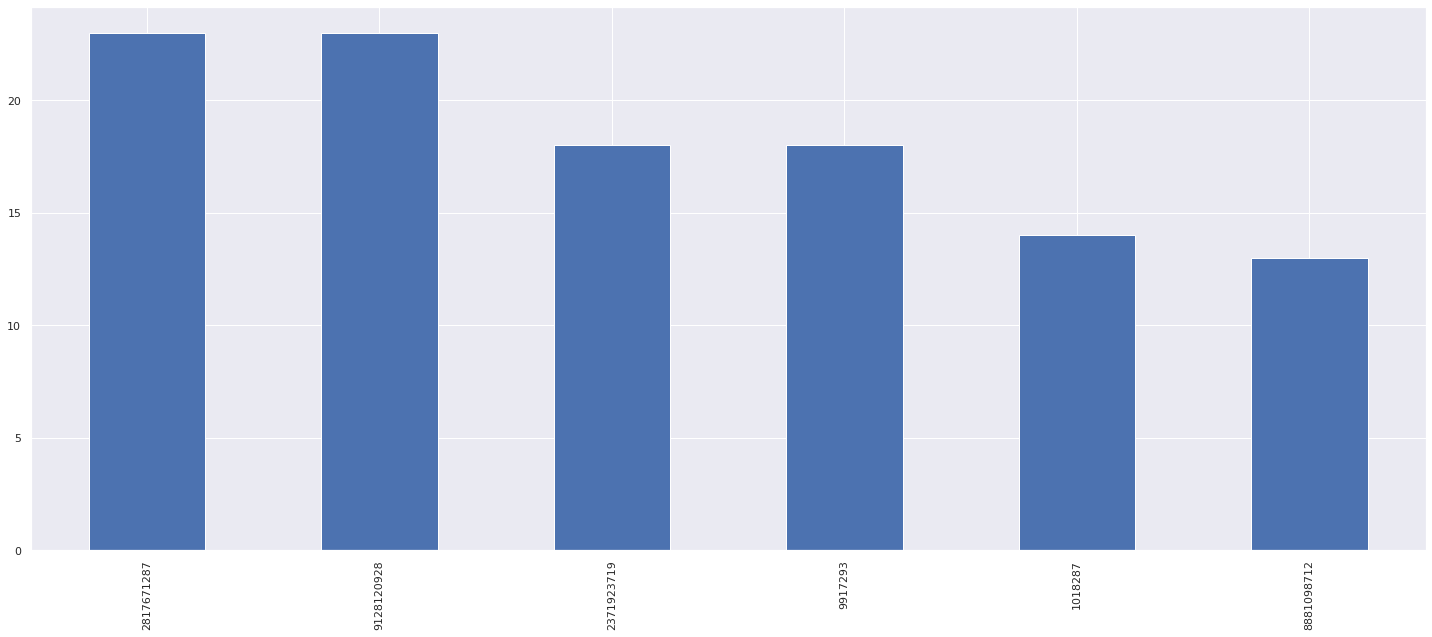

In [173]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
graph1 = SuperTable["ID"].value_counts().plot.bar()

graph1 = plt.show()

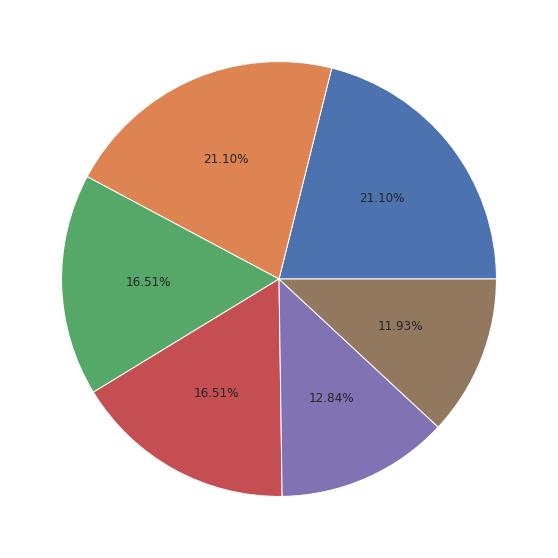

In [174]:
plt.figure(figsize = (25 , 10))

plt.pie(SuperTable["ID"].value_counts(), autopct = "%1.2f%%")

plt.show()

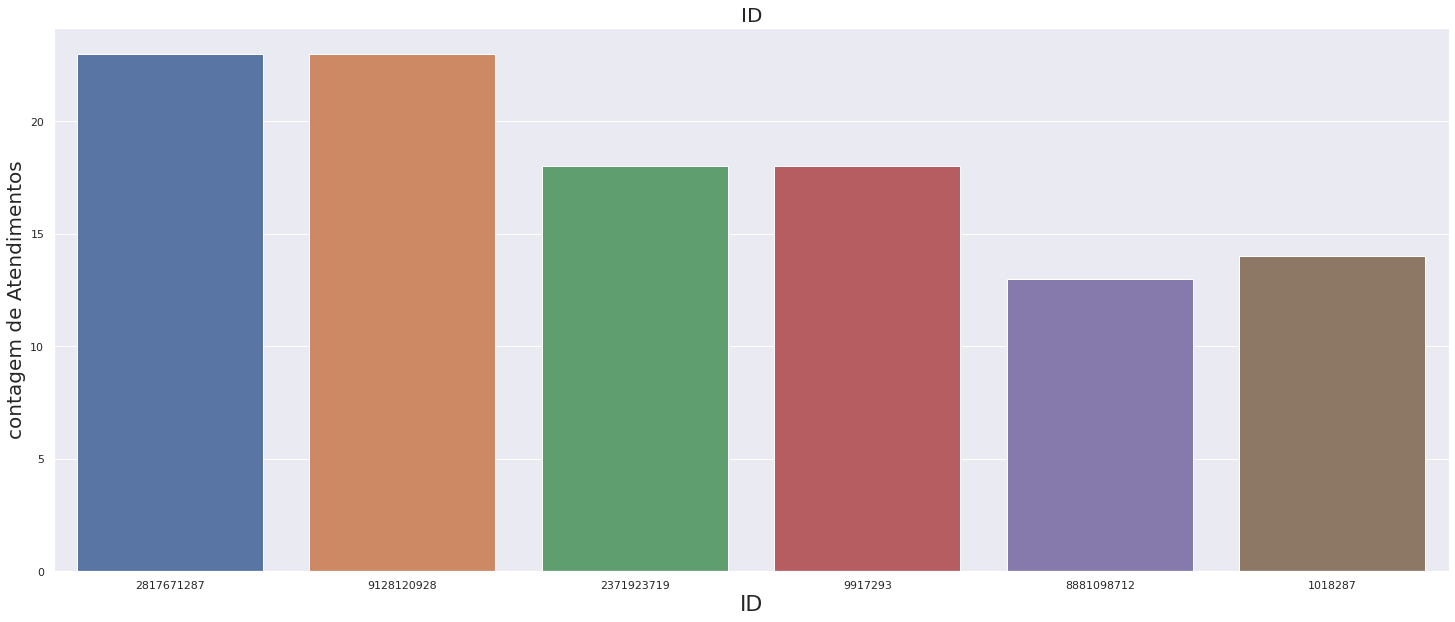

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
sns.set()
ax = sns.countplot(x = "ID", data = SuperTable)
ax.set_title("ID", fontsize = 20)
ax.set_xlabel("ID", fontsize = 22)
ax.set_ylabel("contagem de Atendimentos", fontsize = 20)
plt.show()

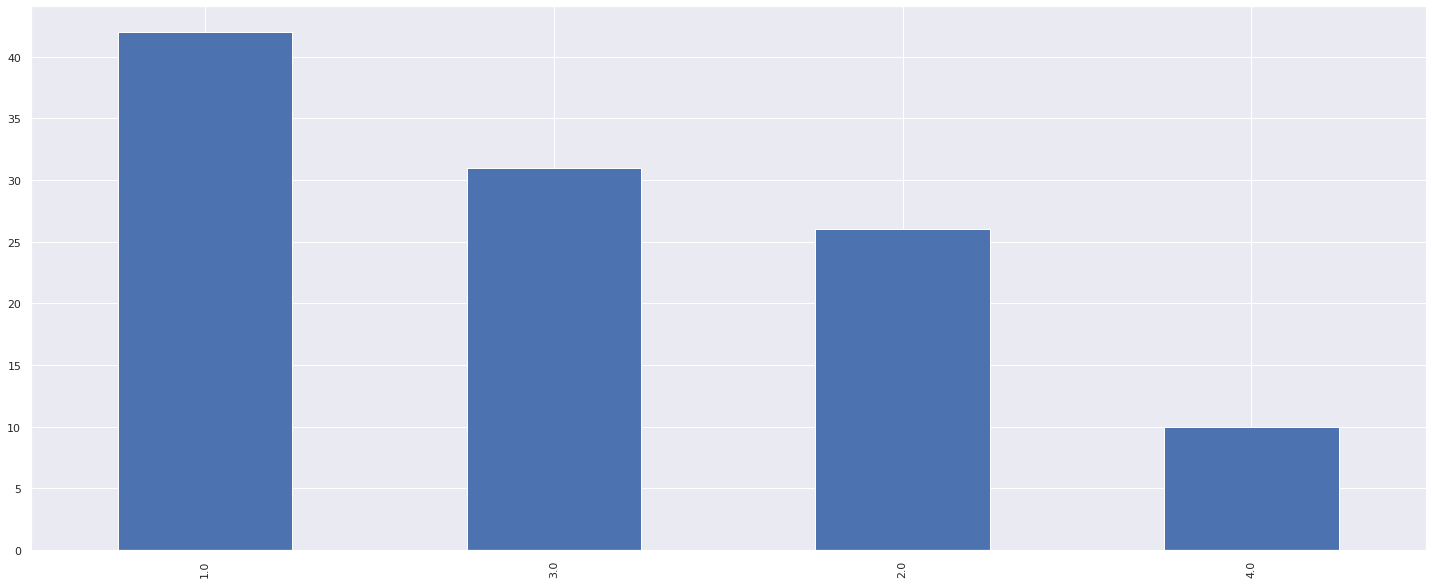

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
graph2 = SuperTable["Qtd"].value_counts().plot.bar()

graph2 = plt.show()

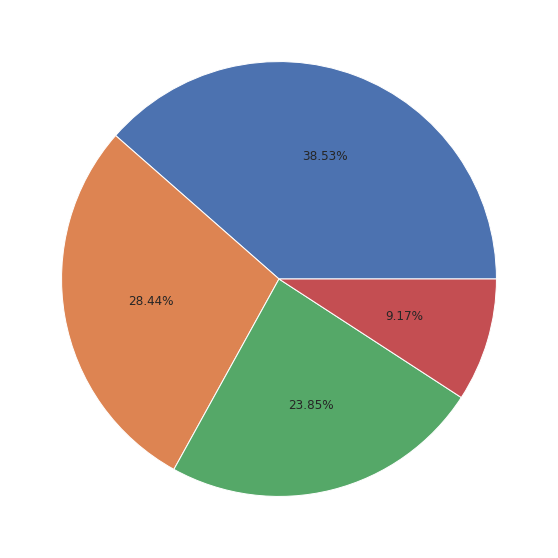

In [176]:
plt.figure(figsize = (25 , 10))

plt.pie(SuperTable["Qtd"].value_counts(), autopct = "%1.2f%%")

plt.show()

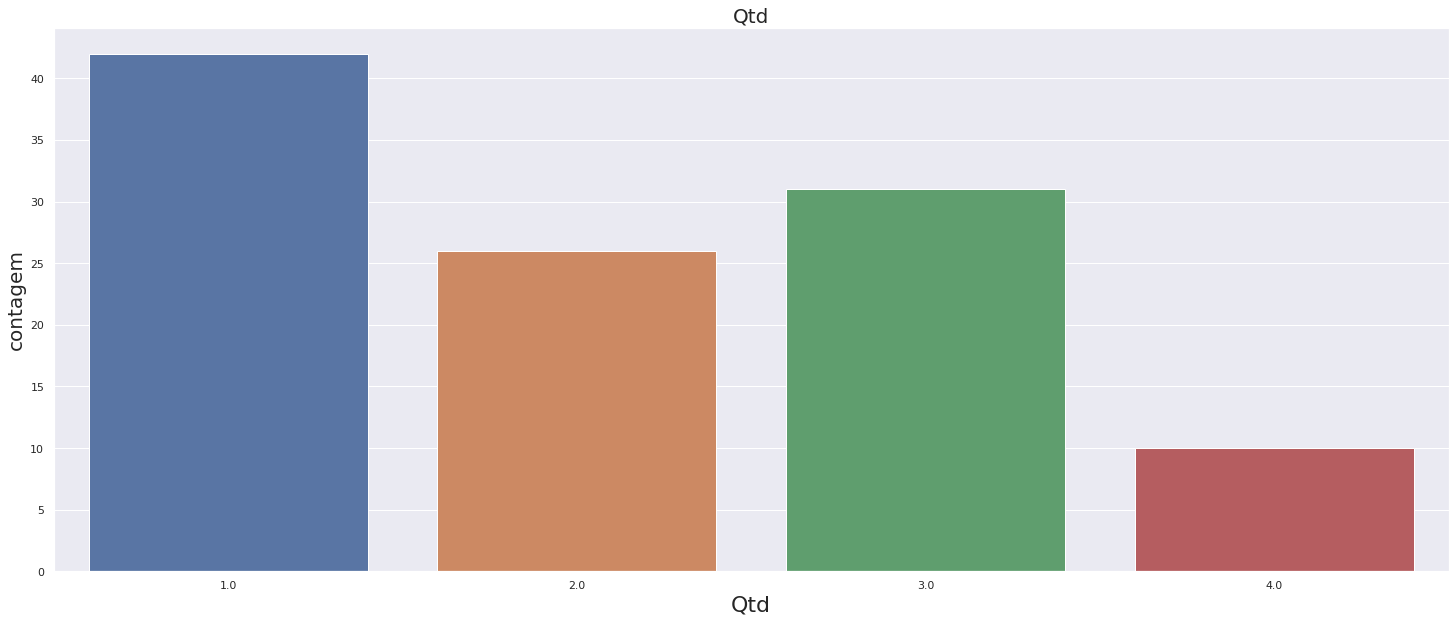

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
sns.set()
ax = sns.countplot(x = "Qtd", data = SuperTable)
ax.set_title("Qtd", fontsize = 20)
ax.set_xlabel("Qtd", fontsize = 22)
ax.set_ylabel("contagem", fontsize = 20)
plt.show()

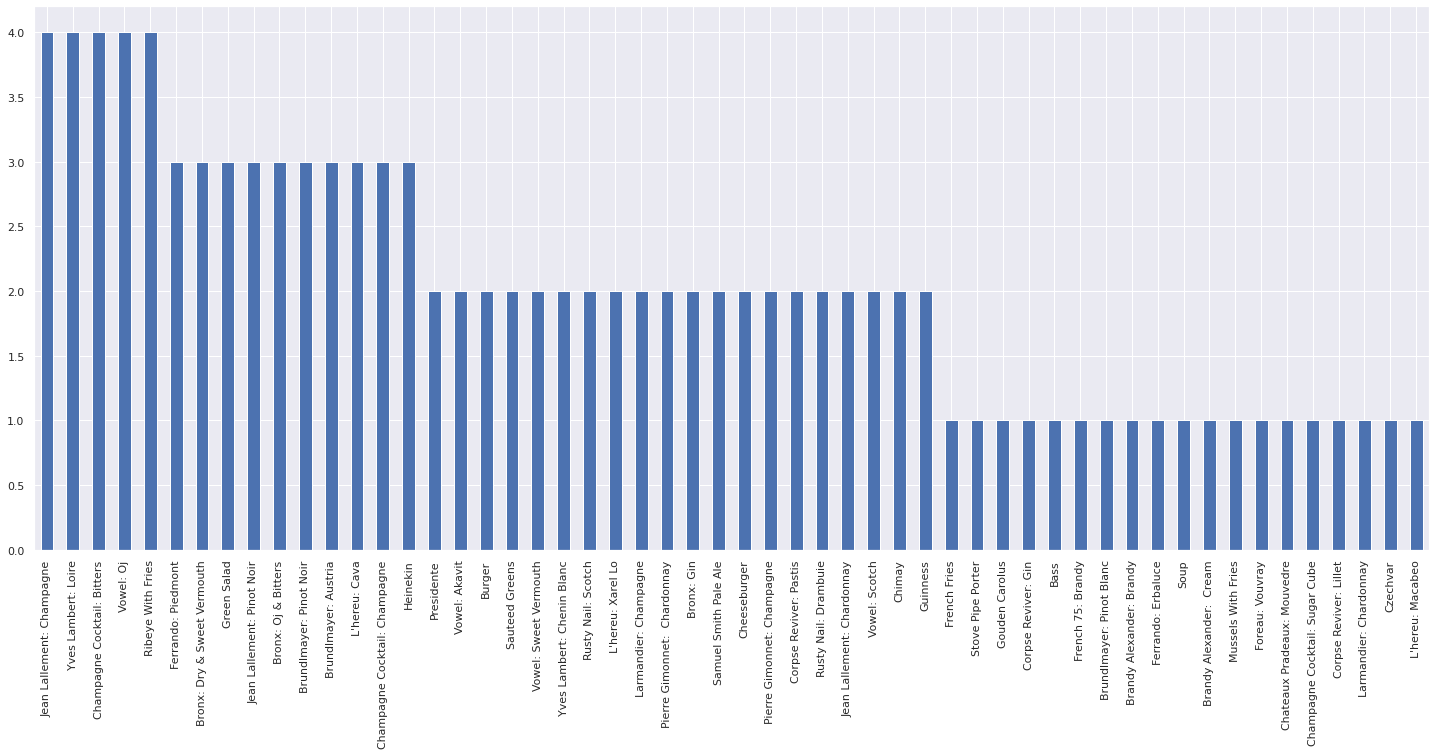

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
graph3 = SuperTable["NomeProduto"].value_counts().plot.bar()

graph3 = plt.show()

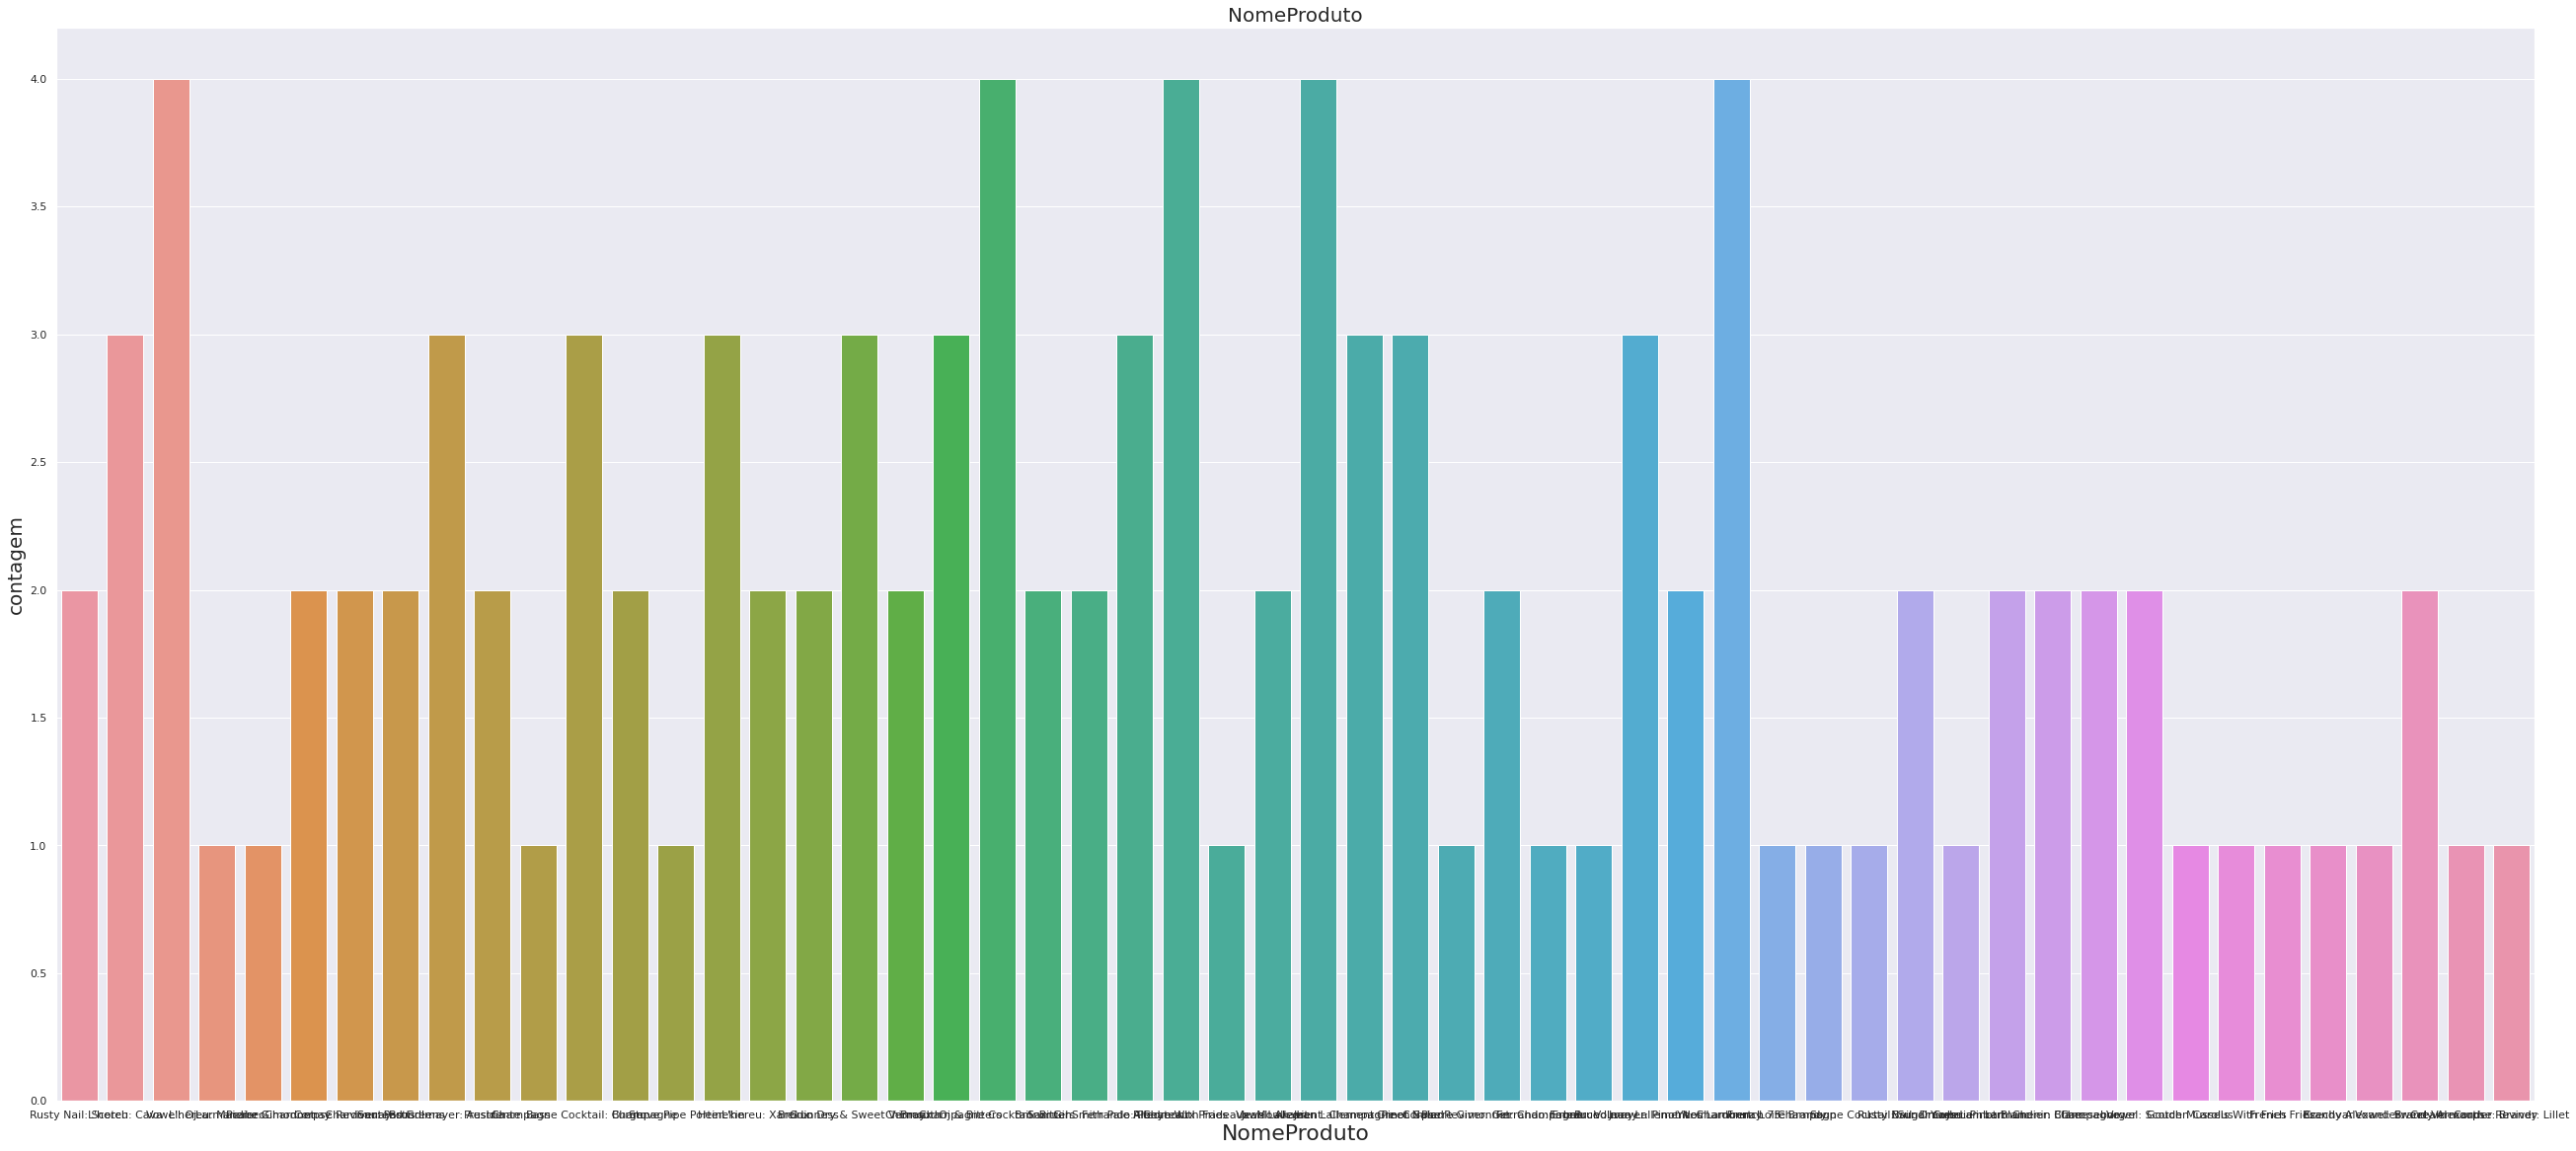

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (45 , 20))
sns.set()
ax = sns.countplot(x = "NomeProduto", data = SuperTable)
ax.set_title("NomeProduto", fontsize = 20)
ax.set_xlabel("NomeProduto", fontsize = 22)
ax.set_ylabel("contagem", fontsize = 20)
plt.show()

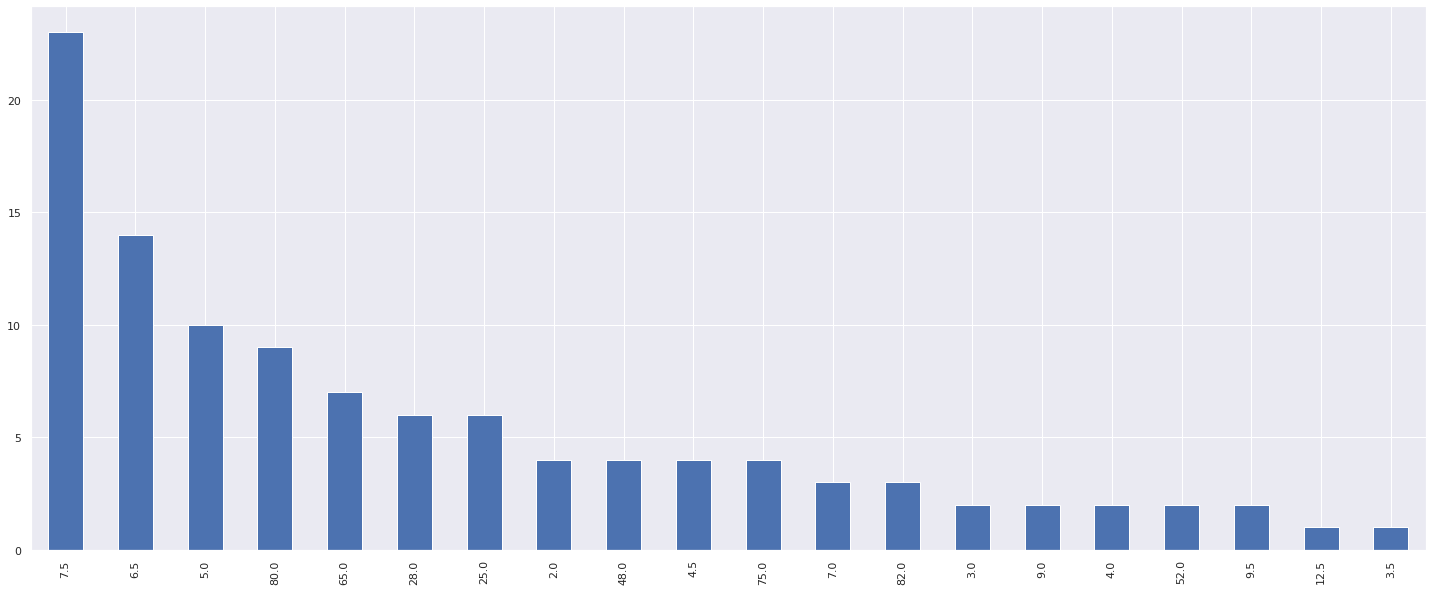

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
graph3 = SuperTable["Preço"].value_counts().plot.bar()

graph3 = plt.show()

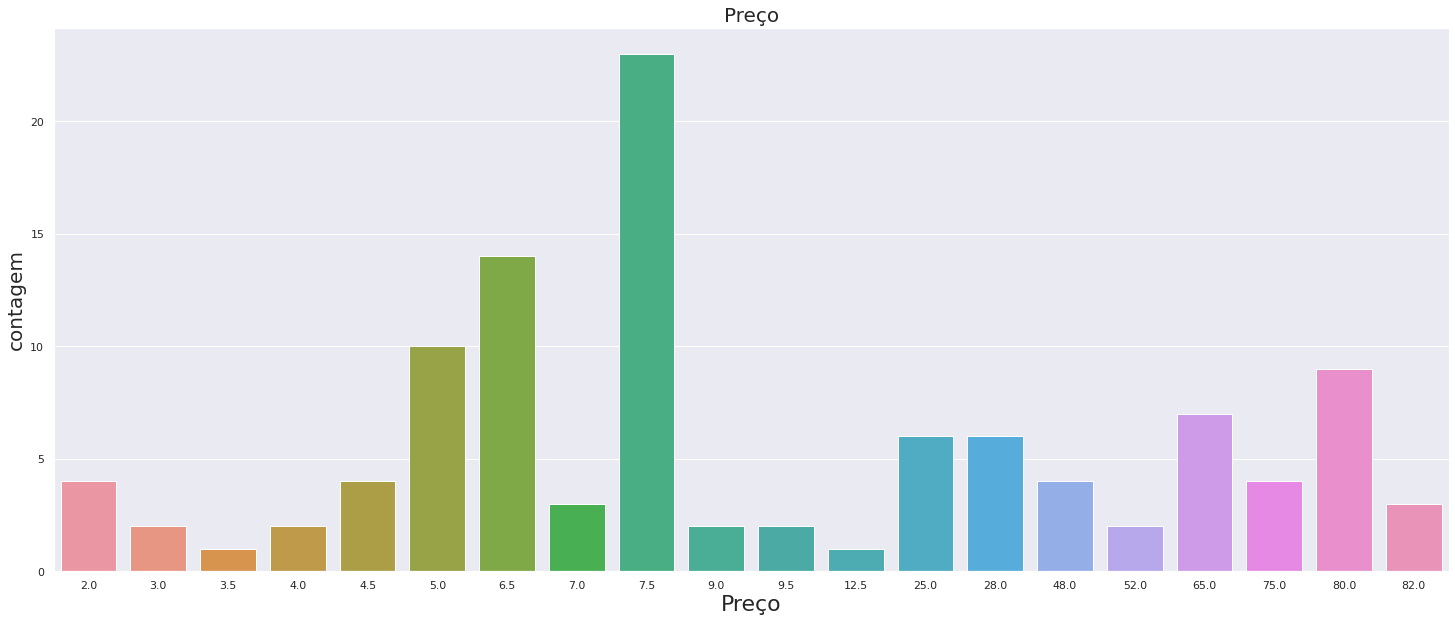

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
sns.set()
ax = sns.countplot(x = "Preço", data = SuperTable)
ax.set_title("Preço", fontsize = 20)
ax.set_xlabel("Preço", fontsize = 22)
ax.set_ylabel("contagem", fontsize = 20)
plt.show()

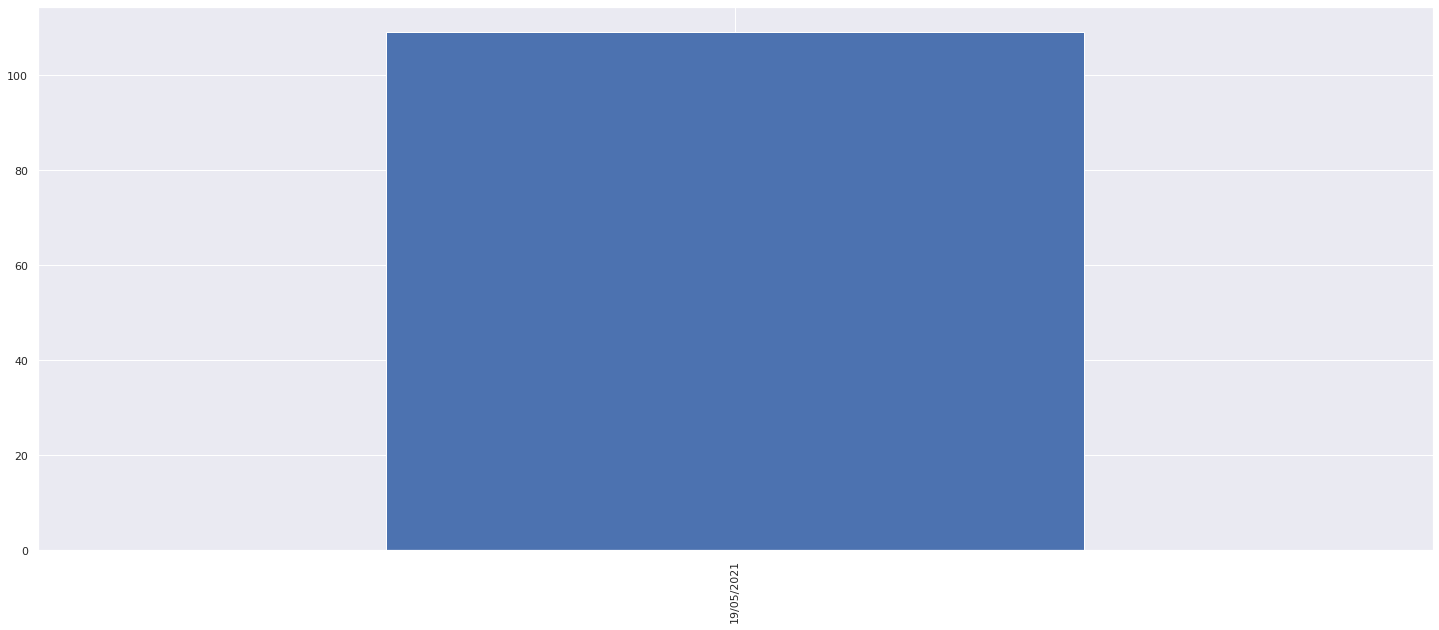

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
graph4 = SuperTable["Data"].value_counts().plot.bar()
#nesse caso fica melhor quanto mais movimentações ocorrerem
graph4 = plt.show()